# **1. Understand Time Series**

* **Definition:** Data collected over time, ***where order matters.***

* **Examples:** Stock prices, monthly sales, temperature readings.

## **Key Components:**

* Trend – long-term movement (up/down)

* Seasonality – repeating pattern (daily, weekly, yearly)

* Noise – random fluctuations

* Cyclic patterns – irregular ups & downs, longer than seasonal

# **2. Explore the Data**

Always plot your data first:

In [ ]:
import matplotlib.pyplot as plt
plt.plot(data['date'], data['value'])
plt.show()

Look for trend, seasonality, outliers, and missing data.

# **3. Preprocessing**

> ## **Check missing values → fill with forward/backward fill.**

* Sometimes your time series has holes (missing days, missing numbers).

* Example: You forgot to record sales on Tuesday.

* To fix:

  * Forward fill (ffill): copy the last known value forward.

  * Backward fill (bfill): copy the next known value backward.

  * This makes the series complete (no blanks).

* For example in the following table, the value of Tue is missing, you can fill it either with Mon's value 100 (Forward fill) or Wed's value 120 (Backward Fill).


> ## **Check stationarity → mean & variance should be constant.**

* Stationary data means its behavior is stable over time.

* In stationary series:

  * Average (mean) doesn’t change much.

  * Spread (variance) doesn’t change much.

* Example:

  * If sales are always around 100 ± 10, stable. ✅

  * If sales keep rising 100 → 200 → 300 → … that’s not stationary ❌ (there’s a trend).

* Many models (like ARIMA) only work well on stationary data.

> ## **Use ADF test in Python (statsmodels.tsa.stattools.adfuller).****

* ADF = Augmented Dickey-Fuller test.

* It checks: “Is my data stationary or not?”

* Output gives a p-value:

  * Small p-value (≤ 0.05) → data is stationary ✅

  * Large p-value (> 0.05) → data is not stationary ❌


> ## **Transform data if needed: log, diff, or scaling.**

* If data is not stationary, you can transform it:

* Log transform: Helps when data grows exponentially (like population, prices).

  * Example: 10, 100, 1000 → take log → 1, 2, 3.

* Differencing: Subtract current value from previous value.

  * Example: [100, 120, 130] → differences [20, 10].

* Removes trend.

* Scaling/Normalization: Adjust values into smaller range so model handles them better.

Preprocessing = cleaning + stabilizing the data so the time series model can learn patterns correctly.


# **4. Time Series Models**

* Classical Models

  * AR (Autoregressive): Uses past values to predict future.

  * MA (Moving Average): Uses past errors to predict.

  * ARMA/ARIMA: AR + MA + Integration (trend handling).

  * SARIMA: ARIMA + seasonality.

  * ML / Deep Learning Models

  * Prophet / NeuralProphet – easy, handles trend & seasonality automatically.

  * LSTM / GRU (Deep Learning) – captures complex patterns in sequences.

# **5. Model Evaluation**

* Use train-test split in time order (don’t shuffle!).

* Metrics:

  * MAE (Mean Absolute Error)

  * RMSE (Root Mean Squared Error)

  * MAPE (Mean Absolute Percentage Error)

  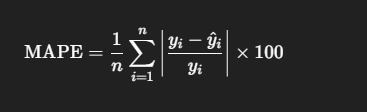

  
* Lower MAPE = better predictions.

* Example: MAPE = 5% means “on average, predictions are off by 5%.”

# **6. Forecasting**

* Fit your model on historical data.

* Predict next periods (days, months, etc.).

* Always visualize predictions vs actuals.

```
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(predictions, label='Forecast')
plt.legend()
plt.show()

```

# **7. Real-Life Example**

* Imagine monthly sales data:

  * Trend: sales slowly increasing year by year.

  * Seasonality: peak every December (holiday shopping).

  * Noise: random dips due to stock shortage or weather.

A pro knows:

  * First check trends & seasonality

  * Then choose model (ARIMA/Prophet/LSTM)

  * Tune hyperparameters carefully

  * Evaluate forecasts and adjust

## **------------ Real Life Example of working on NVIDIA Stocks -------------**

In [2]:
import yfinance as yf
data = yf.download('NVDA', start='2023-01-01', end='2024-01-01')
data.to_csv('nvda_data.csv')

/tmp/ipython-input-4086555188.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download('NVDA', start='2023-01-01', end='2024-01-01')
[*********************100%***********************]  1 of 1 completed


# **Step 1: Load & Explore Data**

In [15]:
import pandas as pd

data = pd.read_csv("/content/nvda_data.csv")
data.head()

,Price,Close,High,Low,Open,Volume
0,Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
1,Date,NaN,NaN,NaN,NaN,NaN
2,2023-01-03,14.302287101745605,14.982683046541192,14.083481722564576,14.837811356872233,401277000
3,2023-01-04,14.73590087890625,14.839808607059629,14.228352617509586,14.554063307465187,431324000
4,2023-01-05,14.252330780029297,14.55106500758206,14.135434115107048,14.478129888796087,389168000


In [16]:
data.columns = ["Date", "Close", "High", "Low", "Open", "Volume"]

In [19]:
data = data[2:]
data.head()

,Date,Close,High,Low,Open,Volume
4,2023-01-05,14.252330780029297,14.55106500758206,14.135434115107048,14.478129888796087,389168000
5,2023-01-06,14.845804214477539,14.996670137157544,14.02153707163228,14.461145896873958,405044000
6,2023-01-09,15.614119529724121,16.041738878678775,15.12755161626986,15.270425206407127,504231000
7,2023-01-10,15.894872665405273,15.947825096516842,15.458260461795822,15.493229228157693,384101000
8,2023-01-11,15.986787796020508,16.01376424221786,15.549177090180791,15.82593149314411,353285000


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 4 to 251
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    248 non-null    object
 1   Close   248 non-null    object
 2   High    248 non-null    object
 3   Low     248 non-null    object
 4   Open    248 non-null    object
 5   Volume  248 non-null    object
dtypes: object(6)
memory usage: 11.8+ KB


# **Step 2: Choose the Target Variable**

Usually stock time series me Close ya Adj Close use karte hain.

In [21]:
ts = data['Close']

In [22]:
ts

,Close
4,14.252330780029297
5,14.845804214477539
6,15.614119529724121
7,15.894872665405273
8,15.986787796020508
...,...
247,48.80828094482422
248,49.257076263427734
249,49.39501953125
250,49.49997329711914


# **Step 3: Check for Missing Values**

In [23]:
ts.isnull().sum()

np.int64(0)

In [28]:
# Although zero null, but if there would be any null, we will fill it with forward fill.
ts = ts.ffill()

# **Step 4: Visualize the Time Series**

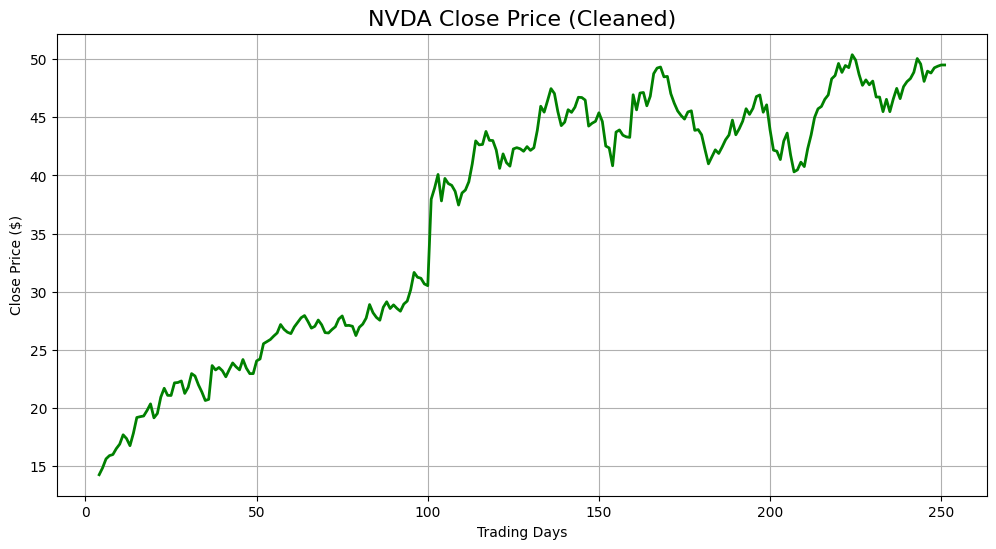

Total data points: 248
Close price range: 14.252330780029297 to 50.38214874267578


In [31]:
import matplotlib.pyplot as plt
import pandas as pd

# # Method 1: Basic plot with proper dates
# plt.figure(figsize=(12, 6))
# plt.plot(data.index, data['Close'], linewidth=2, color='blue')
# plt.title('NVDA Close Price', fontsize=16)
# plt.xlabel('Date')
# plt.ylabel('Close Price ($)')
# plt.grid(True)
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()

# # Method 2: If dates mein problem hai, to simple index use karo
# plt.figure(figsize=(12, 6))
# plt.plot(data['Close'], linewidth=2, color='red')
# plt.title('NVDA Close Price', fontsize=16)
# plt.xlabel('Trading Days')
# plt.ylabel('Close Price ($)')
# plt.grid(True)
# plt.show()

# Method 3: Agar data mein string values hain to convert karo
try:
    close_prices = pd.to_numeric(data['Close'], errors='coerce')
    plt.figure(figsize=(12, 6))
    plt.plot(close_prices, linewidth=2, color='green')
    plt.title('NVDA Close Price (Cleaned)', fontsize=16)
    plt.xlabel('Trading Days')
    plt.ylabel('Close Price ($)')
    plt.grid(True)
    plt.show()
except:
    print("Data conversion mein problem hai")

# Simple stats
print(f"Total data points: {len(data)}")
print(f"Close price range: {data['Close'].min()} to {data['Close'].max()}")

# **Step 5: Check Stationarity (ADF Test)**

Stationary data hona zaroori hai (mean & variance constant).

In [32]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(ts)
print('ADF Statistic:', result[0])
print('p-value:', result[1])


ADF Statistic: -1.773920974909671
p-value: 0.3934838923568217


p-value < 0.05 → stationary

p-value > 0.05 → not stationary (toh difference lena padega).

# **Step 6: Model Selection**

2 common models for stock data:

ARIMA / SARIMA (short-term forecasting, statistical)

Prophet (Facebook) (trend + seasonality capture, easy to use)

Example ARIMA:

In [36]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(ts, order=(5,1,0))  # (p,d,q)
model_fit = model.fit()
print(model_fit.summary())

forecast = model_fit.forecast(steps=30)


ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [37]:
ts = pd.to_numeric(ts, errors="coerce")   # convert to float
ts = ts.ffill()   # fill missing values if any

In [43]:
# Split data into train and test
train = ts[:-30]   # sab data except last 30
test = ts[-30:]    # last 30 days as actual test data

from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train, order=(5,1,0))  # (p,d,q)
model_fit = model.fit()
print(model_fit.summary())

pred = model_fit.forecast(steps=len(test)) # Maan lo 30 days aage ka data forecast karna hai, # Ye tumhe ek Series dega future predicted values ka.


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  218
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -317.427
Date:                Wed, 03 Sep 2025   AIC                            646.853
Time:                        12:26:49   BIC                            667.133
Sample:                             0   HQIC                           655.045
                                - 218                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0502      0.078      0.644      0.520      -0.103       0.203
ar.L2          0.0060      0.075      0.080      0.936      -0.141       0.153
ar.L3         -0.0705      0.064     -1.105      0.2

ARIMA(ts, order=(p, d, q))
yani p, d, q teen parameters hote hain jo model define karte hain.

## **1. p (Auto-Regressive part)**

Kitne past values (lags) use karne hain predict karne ke liye.

Example: agar p=3 hai → model last 3 days ke prices use karke aaj ka price predict karega.

Soch lo tum keh rahi ho:
“aaj ka stock price past 3 din ke prices pe depend karta hai.”

## **2. d (Differencing part)**

Kitni baar data ko difference karna hai taaki wo stationary ban jaye.

Agar data me trend hai → ek baar difference lelo (d=1).

Agar bahut strong trend hai → d=2 bhi karna pad sakta hai.

Soch lo tum keh rahi ho:
“Trend ko remove kar do, bas changes pe focus karo.”

## **3. q (Moving Average part)**

Kitne past forecast errors (residuals) use karne hain predict karne ke liye.

Example: agar q=2 hai → model last 2 days ke errors (kitna galat predict kiya) use karega.

Soch lo tum keh rahi ho:
“Aaj ka prediction kal ke galtiyon se seekh ke banega.”

# **Step 8: Evaluate Model**

Use MAPE or RMSE between actual & predicted.

In [44]:
import numpy as np

def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


In [45]:
# Calculate MAPE
error = mape(test, pred)
print("MAPE:", error)


MAPE: 2.5465782733807103


✅ MAPE ka matlab

Tumhari model ki average error ≈ 2.55% hai.

Matlab jo prediction kiya uska difference actual values se sirf ~2.5% hai → excellent accuracy.

# **Residual Analysis:**

<Axes: title={'center': 'Residuals'}>

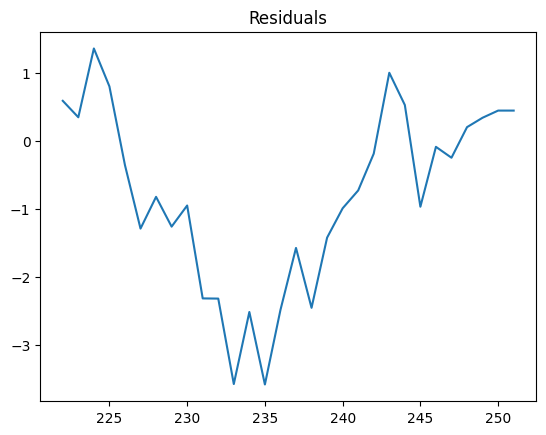

In [46]:
residuals = test - pred
residuals.plot(title="Residuals")


# **Step 9: Plot Actual vs Forecast**

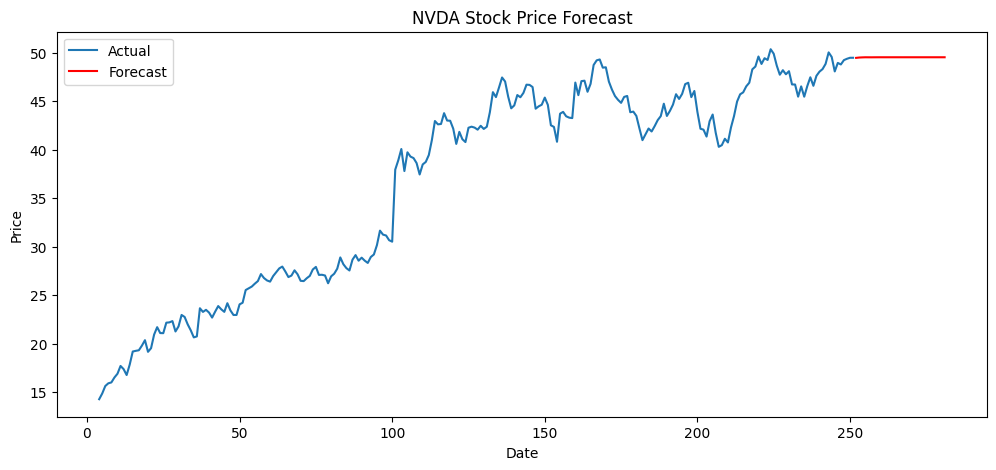

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

# Actual data
plt.plot(ts, label="Actual")

# Forecasted data
plt.plot(forecast.index, forecast, label="Forecast", color="red")

plt.title("NVDA Stock Price Forecast")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()


# **-------------------- Appendices --------------------**

## *Q: Why we need to remove trends*

Answer:

--- What is a trend?

A long-term increase or decrease in data.

Example: Company sales: 100 → 200 → 300 → 400 (always going up).

--- Why trend is a problem?

Many statistical models (like AR, MA, ARIMA) assume:

  * The data has a constant average (mean).

  * The data has a constant spread (variance).

If there’s a strong trend:

The mean keeps changing (100 today, 200 tomorrow…).

Variance may also grow.
➡ This violates the model’s assumptions.

3. Why remove it?

Removing the trend makes the series stationary (stable around a fixed mean).

Stationary data is easier for models to learn patterns like seasonality or autocorrelation.

Otherwise, the model might confuse “trend” with “real signal.”


# **More Methods for Time Series Analysis and Forecasting:**

## **🔹 Statistical Models**

SARIMA (Seasonal ARIMA) → agar data me seasonality (monthly, weekly patterns) ho.

SARIMAX (SARIMA with exogenous variables) → agar tum stock ke sath koi aur factor bhi include karna chahti ho (e.g., interest rate, oil price).

VAR (Vector Auto Regression) → jab tum ek se zyada time series ek sath predict karna chahti ho (multivariate).

## **🔹 Machine Learning Approaches**

Random Forest Regressor (scikit-learn) → lag features banao (past 5 days → next day).

XGBoost / LightGBM → bohot popular boosting models for time series regression.

SVR (Support Vector Regression) → chhote dataset me useful.

## **🔹 Deep Learning Approaches**

RNN (Recurrent Neural Network) → time series ke liye classical DL.

LSTM (Long Short-Term Memory) → sequence memory rakhta hai → stock prices, weather forecasting me bohot use hota hai.

GRU (Gated Recurrent Unit) → LSTM ka lighter version.

1D CNN (Convolutional Neural Network) → patterns detect karne ke liye.

## **🔹 Specialized Forecasting Models**

Facebook Prophet → trend + seasonality capture karta hai, easy to use.

NeuralProphet (Prophet + Neural Nets ka combination).

Theta Model (used in M4 competition, simple but powerful).


tumhare paas 3 levels of choice hain:

1. Statistical (ARIMA family) → quick, interpretable.

2. ML models → agar tum feature engineering karna chahti ho.

3. Deep Learning → agar tumhare paas large dataset hai aur advanced accuracy chahiye.

# **Applying All methods one by one:**

# **1. SARIMA**

Ye ARIMA jaisa hi hai, bas isme ek extra part hota hai seasonality handle karne ke liye. Seasonality are caused by factors like weather, holidays, or calendar-based events. For example, retail sales often spike in December due to the holiday season, and flight prices increase in the summer due to vacations, demonstrating clear seasonal patterns.

### **SARIMA(p,d,q)(P,D,Q,s)**

(p,d,q) → ARIMA ke parameters (lags, differencing, errors)

(P,D,Q,s) → Seasonal part

P = seasonal autoregressive lags

D = seasonal differencing

Q = seasonal moving average

s = season length (e.g., 12 for monthly data with yearly seasonality, 7 for daily data with weekly seasonality)


                                     SARIMAX Results                                     
Dep. Variable:                             Close   No. Observations:                  218
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 5)   Log Likelihood                -318.870
Date:                           Wed, 03 Sep 2025   AIC                            647.739
Time:                                   12:35:06   BIC                            664.522
Sample:                                        0   HQIC                           654.523
                                           - 218                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0513      2.353     -0.022      0.983      -4.662       4.560
ma.L1          0.0854      2.341      0.036

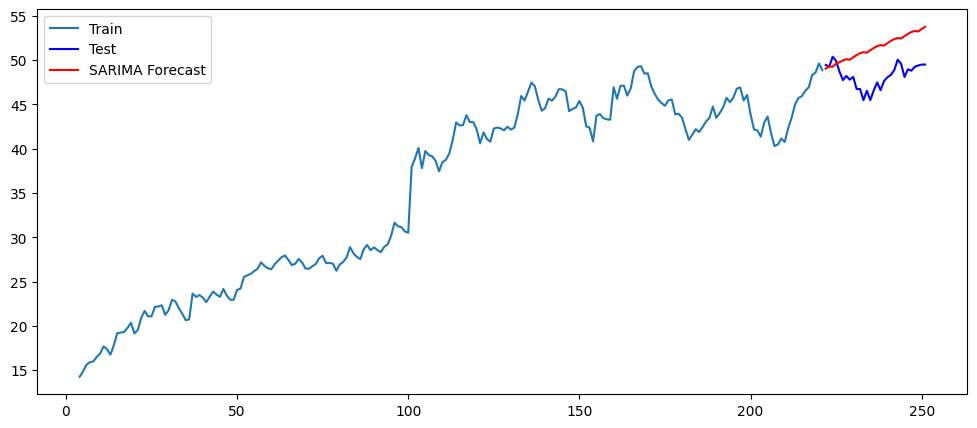

In [47]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train,
                order=(1,1,1),          # (p,d,q)
                seasonal_order=(1,1,1,5))  # (P,D,Q,s)
model_fit = model.fit(disp=False)
print(model_fit.summary())

pred = model_fit.forecast(steps=len(test))
plt.figure(figsize=(12,5))
plt.plot(train, label="Train")
plt.plot(test, label="Test", color="blue")
plt.plot(pred.index, pred, label="SARIMA Forecast", color="red")
plt.legend()
plt.show()



In [48]:
import numpy as np

def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

error = mape(test, pred)
print("SARIMA MAPE:", error)


SARIMA MAPE: 6.851297422845491


Achha 👌 tumne SARIMA try kiya aur MAPE ≈ 6.85% aaya, jo ARIMA ke 2.55% se zyada hai.
Matlab is case me SARIMA ne ARIMA se better perform nahi kiya.

Yeh is liye hota hai:

Stock prices me strong seasonal pattern nahi hota (jese electricity demand, sales data, weather data me hota hai).

Is wajah se SARIMA ka seasonal part overfitting kar leta hai, aur error barh jata hai.

# **2. SARMIAX**

* SARIMA ka extended version hai.

* Full form: Seasonal AutoRegressive Integrated Moving Average with eXogenous regressors.

### **🔸 Difference between SARIMA vs SARIMAX**

SARIMA → sirf apne past values aur seasonality se forecast banata hai.

SARIMAX → apne past values + seasonality + external regressors (jaise interest rate, inflation, oil price, S&P500 index, news sentiment, etc.) use karta hai.

### **Example:**

Agar tum NVDA (Nvidia) ka stock predict kar rahi ho aur tumhe lagta hai ke

Nasdaq Index

USD exchange rate

Semiconductor sales data

iska stock effect karte hain → to ye variables tum SARIMAX me exog parameter me de sakti ho.

Exogenous: having an external cause or origin.

In [49]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Suppose we use Nasdaq index as exog
train_exog = nasdaq_data[:'2023']
test_exog = nasdaq_data['2024':]

model = SARIMAX(train, exog=train_exog, order=(1,1,1), seasonal_order=(0,1,1,12))
fit = model.fit()

# When forecasting, we must also provide future Nasdaq values
forecast = fit.get_forecast(steps=len(test_exog), exog=test_exog)



Future exog kya hai?

Jab tum forecast future values karna chah rahi ho, model ko future ke external variables bhi chahiye.

Matlab:

Agar tum model ko Nasdaq index dete ho as exog, to future prediction ke liye tumhe aage ke Nasdaq index values bhi deni hongi.

Agar tumhe wo values nahi maloom → ya to tum unko bhi predict karoge pehle, ya phir assume karoge.

* Tumhare NVDA dataset me abhi sirf NVDA ka stock data hai, koi external variable nahi.
* Is liye SARIMAX run karne ke liye hum ya to:

* Bina exog run karein (wo SARIMA jesa hi ban jayega),

* Ya extra data (e.g., Nasdaq Index) bhi Yahoo Finance se download karke use karein.

# **3. VAR (Vector Auto Regressor)**

* VAR multiple series ke beech ke relationships seekhta hai aur unko ek saath predict karta hai.

## **🔸 Example**

* Agar tumhare paas sirf NVDA stock price hai → ARIMA/SARIMA theek hai.

* Lekin agar tumhare paas multiple related time series hain, jaise:

    * NVDA stock price

    * AMD stock price

    * Nasdaq Index

    * Trading Volume

to VAR in sabko ek saath model karega, kyunki ye ek dusre ko influence karte hain.

## **🔹 VAR ke assumptions**

Saari series stationary honi chahiye (mean & variance constant over time).

Saari series ek DataFrame me ho (multivariate).


In [ ]:
from statsmodels.tsa.api import VAR
import pandas as pd

# Suppose we have NVDA and AMD data
df = pd.concat([nvda['Close'], amd['Close']], axis=1)
df.columns = ['NVDA', 'AMD']

# Check stationarity (ADF test) and make stationary if needed
# Train-Test Split
train = df[:-30]
test = df[-30:]

# Fit VAR model
model = VAR(train)
model_fitted = model.fit(5)  # lag order

# Forecast
forecast = model_fitted.forecast(train.values, steps=30)
forecast_df = pd.DataFrame(forecast, index=test.index, columns=['NVDA_forecast','AMD_forecast'])


⚡ Matlab:

Agar tum NVDA + AMD ya NVDA + Nasdaq Index download kar lo, tab VAR try kar sakte ho.

Warna abhi ke liye ye method skip karna padega.

# **How to make data Stationary:**

* Differencing (data(t) - data(t-1))

* Transformation (log, sqrt, etc.)

* ADF ek test hai, method nahi.

# **Prophet ka advantage:**

* Prophet automatically handle karta hai seasonality, holidays, missing values.

* Use karna ARIMA se zyada easy hai (Facebook ne non-experts ke liye banaya).
